<a href="https://colab.research.google.com/github/Todimu-sama/Well_of_knowledge/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# First we import data handling libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Logistic regression algorithm
from sklearn.linear_model import LogisticRegression

In [2]:
# Now let us import our data into the code
from google.colab import files
import io

uploaded = files.upload()

Saving train_clean.csv to train_clean.csv


In [3]:
tit_tr = pd.read_csv(io.BytesIO(uploaded['train_clean.csv']))
tit_tr.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [4]:
# some exploratory dat a analysis
print('{0} rows in training set'.format(tit_tr.shape[0]))
print(tit_tr['Survived'].value_counts())
print('{0} people survived while {1} people died in the titanic training dataset'.format(342, 549))

891 rows in training set
0.0    549
1.0    342
Name: Survived, dtype: int64
342 people survived while 549 people died in the titanic training dataset


In [6]:
 pre processing the data

# for sex
tit_tr['Sex'] =  tit_tr['Sex'].astype('category')
tit_tr['Sex'] = tit_tr['Sex'].cat.codes

# for embarked and title columns
cat = ['Embarked', 'Title']

for var in cat:
    tit_tr = pd.concat([tit_tr, pd.get_dummies(tit_tr[var], prefix=var)], axis=1)
    del tit_tr[var]

# Dropping unnecessary columns 
tit_tr = tit_tr.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [7]:
tit_tr.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,Family_Size,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,7.2500,0,3,1,1,0.0,1,0,0,1,0,0,0,1,0,0
1,38.0,71.2833,0,1,0,1,1.0,1,1,0,0,0,0,0,0,1,0
2,26.0,7.9250,0,3,0,0,1.0,0,0,0,1,0,0,1,0,0,0
3,35.0,53.1000,0,1,0,1,1.0,1,0,0,1,0,0,0,0,1,0
4,35.0,8.0500,0,3,1,0,0.0,0,0,0,1,0,0,0,1,0,0


In [8]:
# Next stage in the implementation stage is to split the training data into training and validation sets
# This is done using the train test split module

target = 'Survived'
X = np.array(tit_tr.drop([target], 1))
y = np.array(tit_tr[target])

# random state parameter ensures that the data is split using the same initial splitting conditions anytime 
# we rerun the code
X_train, X_value, y_train, y_value = train_test_split(X, y, test_size=0.3, random_state=5)

In [10]:
# training the model
reg = LogisticRegression()
reg.fit(X_train, y_train)

# making predictions in order to test accuracy of the model
b = reg.predict(X_value)
b = b.astype('int')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
# import model evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
print('Logistic Regression Accuracy : ', accuracy_score(y_value, b))

Logistic Regression Accuracy :  0.8507462686567164


In [26]:
# Plotting confusion matrix

import seaborn as sns 
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_value, b)
print(conf_matrix)

[[154  13]
 [ 27  74]]


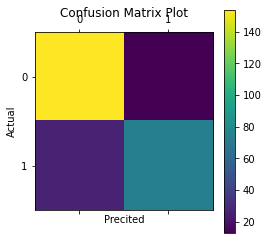

In [27]:
plt.matshow(conf_matrix)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show()

In [31]:
print('from the matrix above,\nwe can see that {0} deaths were predicted correclty, \n{1} survived were predicted correctly'
                        .format(conf_matrix[0][0], conf_matrix[1][1]) )

from the matrix above,
we can see that 154 deaths were predicted correclty, 
74 survived were predicted correctly


In [36]:
print('The model also has an accuracy score of {}'.format(accuracy_score(y_value, b)))

The model also has an accuracy score of 0.8507462686567164
